# Introdução à Computação Visual - EP: Calibração de Câmeras

**Aluna**: Isabela Marina Ferreira Pires<br>
**Matrícula**: 2017014634<br>

## Introdução

Com objetivo de calibrar a câmera do meu celular, o trabalho prático consiste em utilizar um método simples baseado em cálculos de acordo com as dimensões reais de um livro e um método mais robusto, com o uso de um toolkit para Matlab que faz detecção de bordas em uma série de imagens. Ao final do processo, os resultados encontrados em ambos os métodos deverão ser comparados com os dados reais da câmera utilizada.<br>

## Câmera - Especificações

Celular: Zenfone 3 MAX<br>
Marca:ASUS<br>
Câmera: 13.Mpx<br>
Distância focal: 3.5mm<br>

## Calibração - Método Simples

In [22]:
from IPython.display import Image

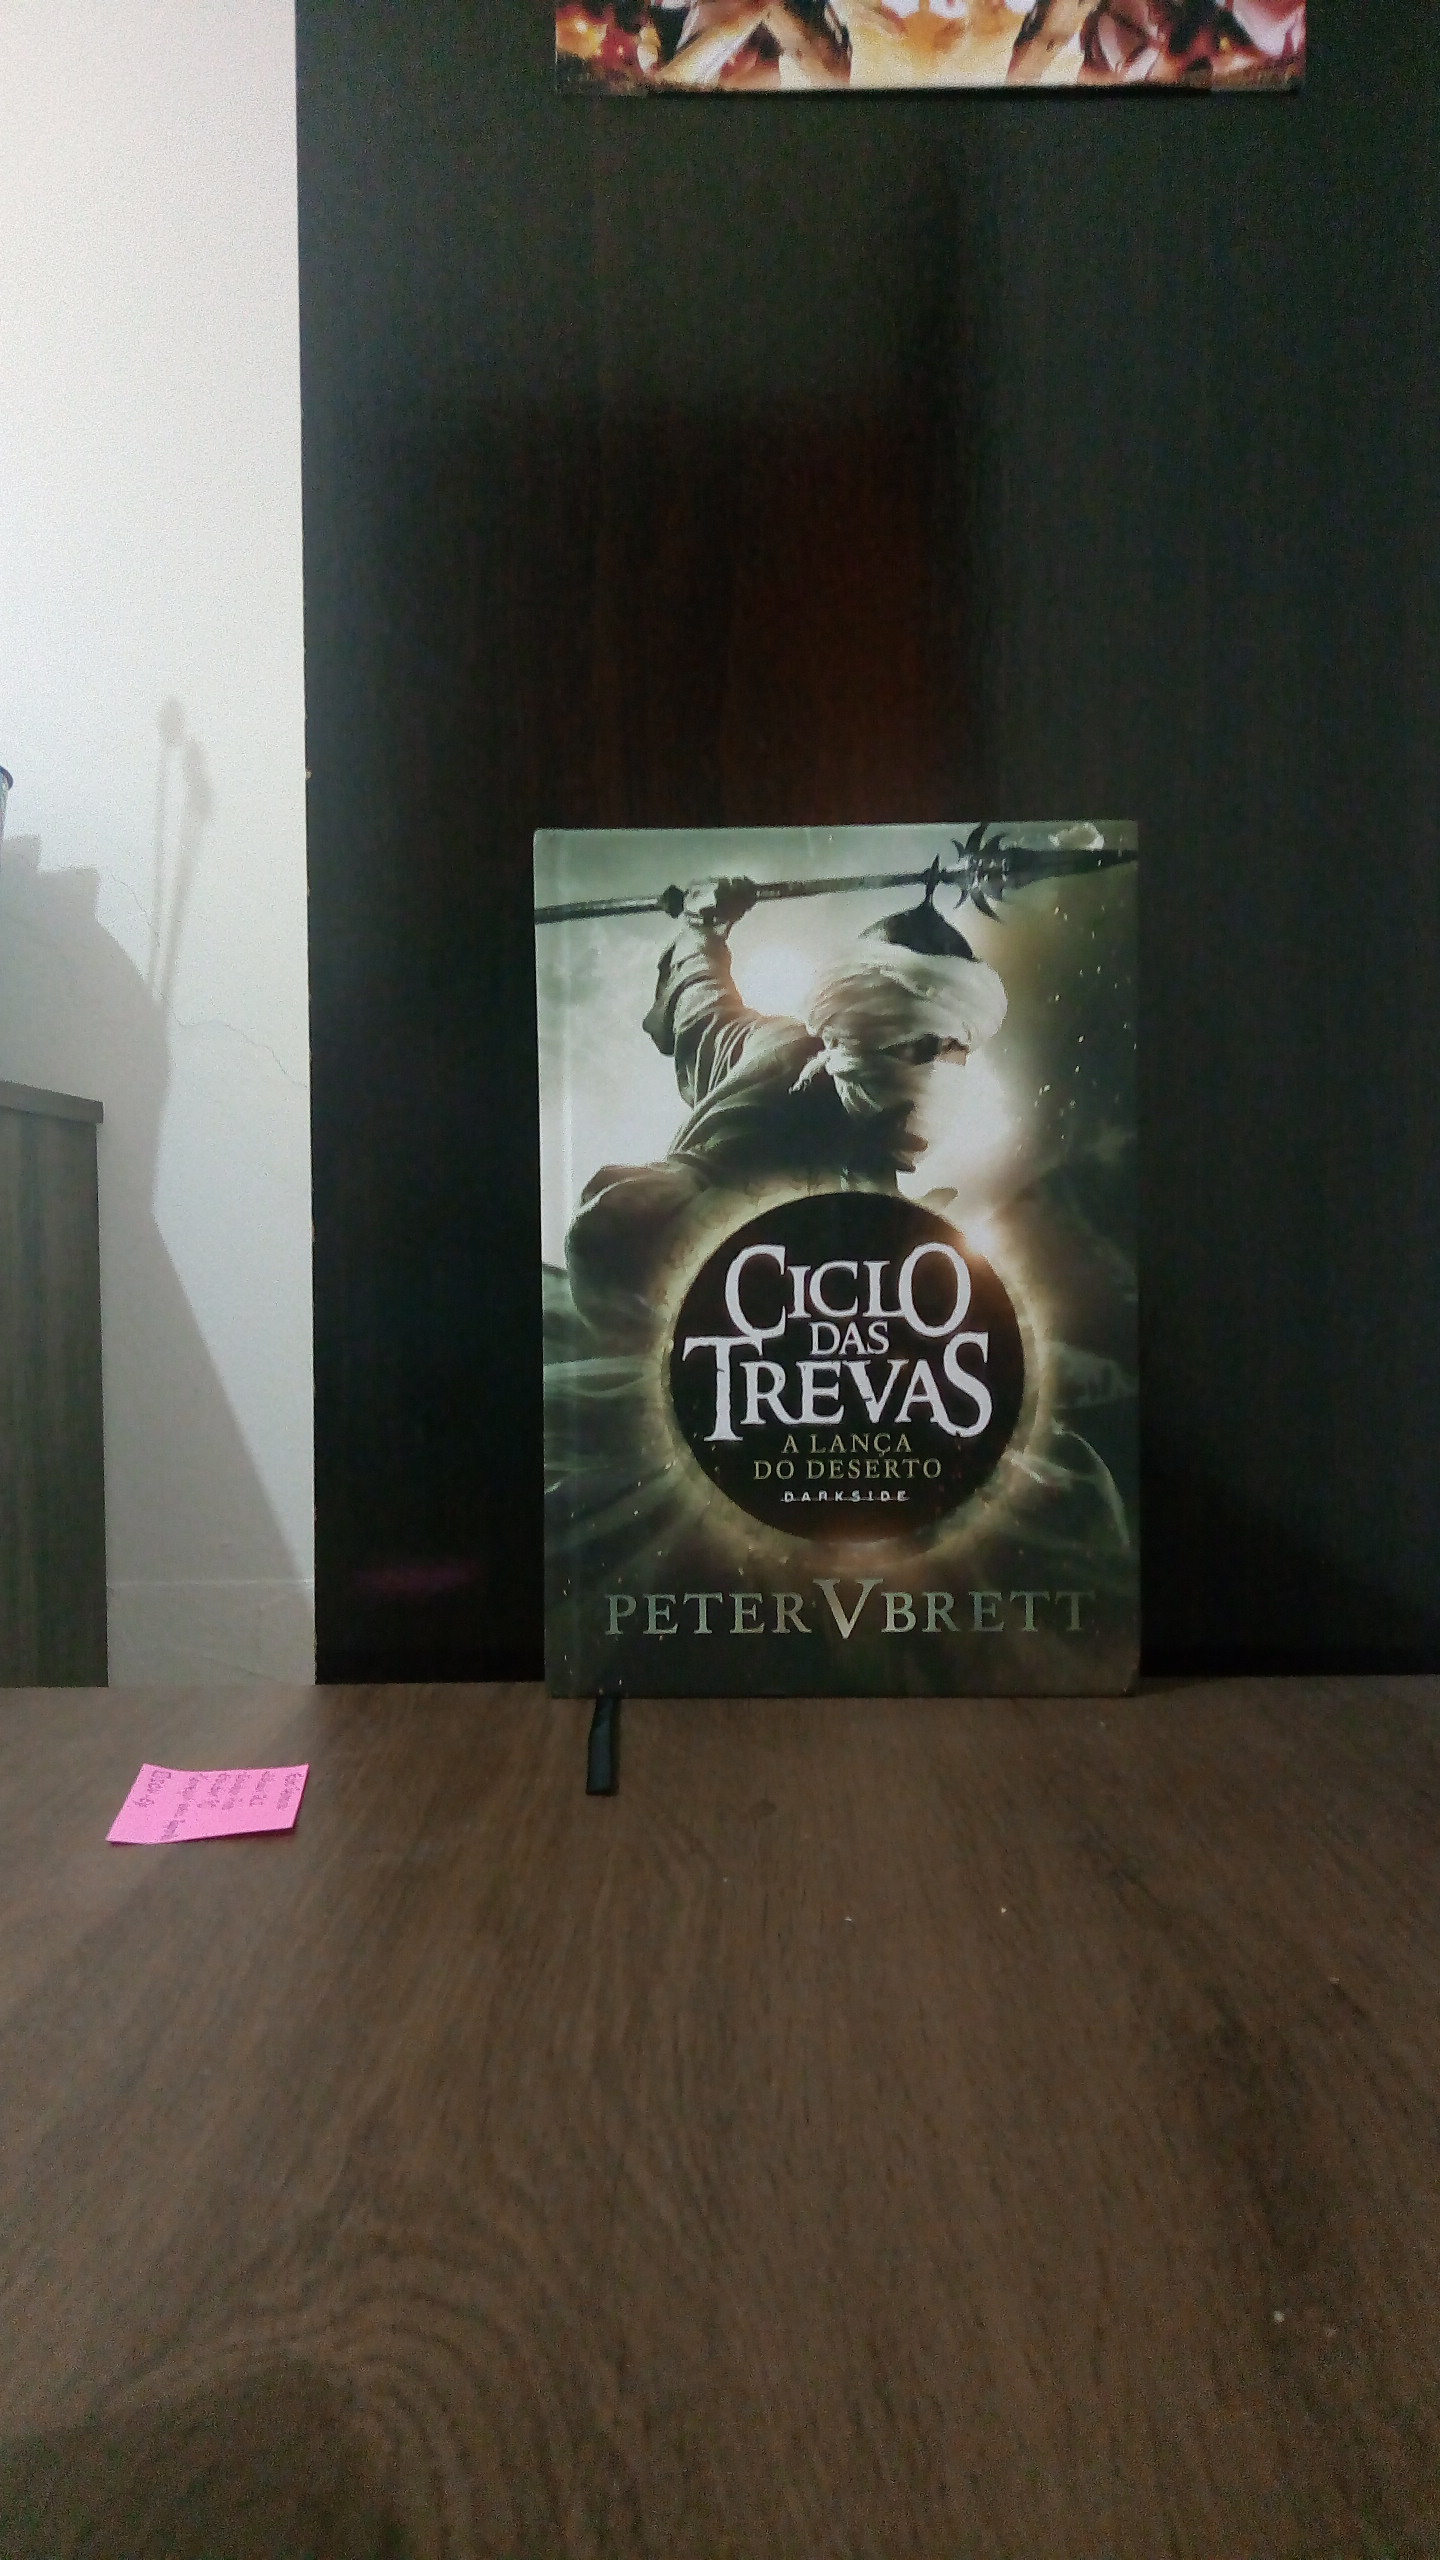

In [23]:
Image('livro.jpg')

O método consiste em tirar uma foto de um livro tendo medido suas dimensões e a distância entre ele e a câmera. Então, atrávés da foto, as dimensões do livro são medidas novamente em pixels e, usando as medidas nas duas unidades, é calculada a distância focal aproximada da câmera.<br>
As dimensões reais do livro são:<br>

$d_X=235$ - altura do livro<br>
$d_Y=161$ - largura do livro<br>
$d_Z=495$ - distância entre o livro e a câmera<br>

As dimensões do livro na imagem são:<br>

$d_x=829$ - altura do livro<br>
$d_y=639$ - largura do livro<br>

Com estes valores, são calculadas as distâncias focais:<br>

In [21]:
dX=235
dY=161
dZ=495
dx=829
dy=639

fx=(dx*dZ)/dX
fy=(dy*dZ)/dY
print(fx)
print(fy)

1746.1914893617022
1964.6273291925465


**Matriz de parâmetros intrínsecos**: fornecem características ópticas e geométricas internas da câmera

In [17]:
import numpy as np

c=1440
r=2560

Mint=np.array([[fx, 0, (c/2)], 
     [0, fy, (r/2)], 
     [0, 0, 1]])
print(Mint)

[[1.74619149e+03 0.00000000e+00 7.20000000e+02]
 [0.00000000e+00 1.96462733e+03 1.28000000e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


**Matriz de parâmetros extrínsecos**: fornecem informações sobre o posicionamento e orientação da câmera de acordo com um sistema de coodenadas global

In [18]:
Mext=np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
print(Mext)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


## Calibração Robusta

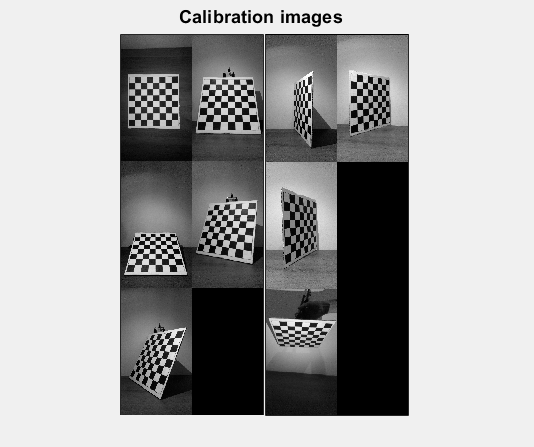

In [24]:
Image('calibration_images.png')

A calibração robusta consiste em usar um toolkit para matlab que realiza extração e reconhecimento de bordas para detectar a distância focal. <br>
São tiradas fotos de um tabuleiro de xadrez e essas fotos são utilizadas para realizar a calibração da câmera. O toolkit requisita que o usuário selecione, em todas as fotos, as bordas da área que será verificada, além do número de quadrados ao longo dos eixos 'x' e 'y' e o tamanho em milímetros. Em seguida, o programa entrega as bordas de cada um dos quadrados na área selecionada das fotos.<br>
Após a análise em todas as imagens o programa retorna dados aproximados da câmera assim como a distância focal em pixels.<br>
Os resultados de calibração mostrados a seguir foram obtidos após a otimizaçao feita pelo programa e contêm incertezas: <br>

**Focal Length**:   fc = [1907.99014   1911.85764]<br>
**Principal point**:   cc = [696.32639   1276.80286]<br>
**Skew**:   alpha_c = [0.00000] => angle of pixel axes = 90.00000 degrees<br>
**Distortion**:   kc = [0.04823   -0.04944   -0.00271   0.00065   0.00000]<br> 
**Pixel error**:  err = [2.18947   1.82041]<br>

### Observações:

A ASUS não disponibilizou a informação do tamanho do sensor, logo não foi possível realizar a conversão correta de pixels para milímetros ou vice e versa